In [10]:
import pandas as pd 
import numpy as np
import re
import sys, getopt
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_dataset(file_path):
    return pd.read_csv(file_path)

os.chdir('/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings')

os.getcwd()

'/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings'

In [12]:
import pandas as pd
import numpy as np

# Load your data
latest_match_data = pd.read_csv('create_dataset_1/CSVs we use often/latest_match_data_july_12_superstar_info_recalculated.csv')

# Calculate win percentage for the more valuable team
#latest_match_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
latest_match_data['mv_difference_abs'] = latest_match_data['Market.Value.Difference'].abs()
# Assuming 'latest_match_data' is already loaded
latest_match_data['MV_Prediction_Correct'] = np.where(
    (latest_match_data['Market.Value.Difference'] < 0) & (latest_match_data['Score.Difference'] < 0), 1,
    np.where(
        (latest_match_data['Market.Value.Difference'] > 0) & (latest_match_data['Score.Difference'] > 0), 1, 0
    )
)
latest_match_data['smaller_team_value'] = latest_match_data[['Team.1.Total.Market.Value', 'Team.2.Total.Market.Value']].min(axis=1)

In [6]:
market_value_data = load_csv_dataset('market_value_data_confederations_added_june_18.csv')

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87845/1806818139.py:11: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


## part 2 - find all games where MV and Rank are opposite signs

### Prelude 

### Dot spray chart of all the MV differences by interval of ranking difference

In [32]:

#
latest_match_data['rank_difference_abs'] = latest_match_data['Rank.Difference'].abs()

# Define the intervals for rank differences
rank_intervals = [0, 3, 7.5, 15, 22.5, 30, 60, 90, 120, 150, 180, 210]
rank_labels = ['0-3', '3-7.5', '7.5-15', '15-22.5', '22.5-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210']

# Create a new column for the rank intervals
latest_match_data['rank_interval'] = pd.cut(latest_match_data['rank_difference_abs'], bins=rank_intervals, labels=rank_labels)

# Group by the rank intervals and calculate the range of MV differences
mv_difference_stats = latest_match_data.groupby('rank_interval')['Market.Value.Difference'].agg(['min', 'max', 'mean', 'std']).reset_index()

# Display the results
print(mv_difference_stats)

   rank_interval          min          max          mean           std
0            0-3 -464000000.0  519300000.0  7.156000e+06  1.162250e+08
1          3-7.5 -444200000.0  787735000.0  1.493267e+07  1.301992e+08
2         7.5-15 -677050000.0  639025000.0  6.978842e+06  1.385583e+08
3        15-22.5 -557300000.0  577850000.0  3.189204e+06  1.340045e+08
4        22.5-30 -519170000.0  882000000.0  1.195620e+07  1.308534e+08
5          30-60 -613000000.0  730300000.0  6.073216e+06  1.405433e+08
6          60-90 -628150000.0  572975000.0  4.533573e+06  1.292674e+08
7         90-120 -558950000.0  719875000.0  2.395406e+06  1.357984e+08
8        120-150 -723515000.0  618825000.0  4.955783e+06  1.393219e+08
9        150-180 -694412500.0  588325000.0  1.959630e+06  2.154546e+08
10       180-210 -706650000.0  598265000.0  5.398250e+06  2.898303e+08


/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87845/1602513662.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mv_difference_stats = latest_match_data.groupby('rank_interval')['Market.Value.Difference'].agg(['min', 'max', 'mean', 'std']).reset_index()


In [39]:
from matplotlib.ticker import FuncFormatter


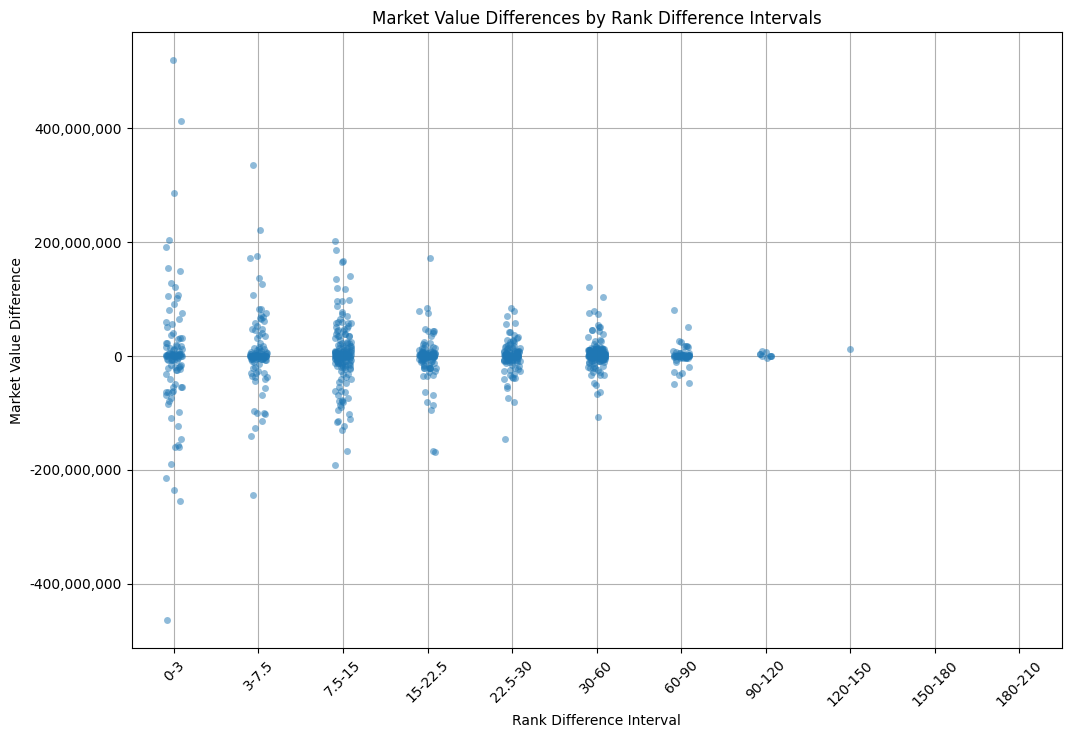

In [45]:
latest_match_data['rank_difference_abs'] = latest_match_data['Rank.Difference'].abs()

# Define the intervals for rank differences
rank_intervals = [0, 3, 7.5, 15, 22.5, 30, 60, 90, 120, 150, 180, 210]
rank_labels = ['0-3', '3-7.5', '7.5-15', '15-22.5', '22.5-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210']

# Create a new column for the rank intervals
latest_match_data['rank_interval'] = pd.cut(latest_match_data['rank_difference_abs'], bins=rank_intervals, labels=rank_labels)

# Create the strip plot
plt.figure(figsize=(12, 8))
sns.stripplot(x='rank_interval', y='Market.Value.Difference', data=filtered_data, jitter=True, alpha=0.5)
plt.xlabel('Rank Difference Interval')
plt.ylabel('Market Value Difference')
plt.title('Market Value Differences by Rank Difference Intervals')
plt.xticks(rotation=45)
plt.grid(True)

# Format the y-axis to display whole numbers
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

### Differneces being opposite AT ALL

In [44]:
filtered_data = latest_match_data[
    ((latest_match_data['Rank.Difference'] > 0) & (latest_match_data['Market.Value.Difference'] < 0)) |
    ((latest_match_data['Rank.Difference'] < 0) & (latest_match_data['Market.Value.Difference'] > 0))
]
filtered_data
filtered_data.to_csv('ranking_difference__Mv_difference_opposite.csv')

In [ ]:
#being more specific than the MV difference and Rankings being opposite 

#WE WANT THAT HEAT MAP. THATS THE FIRST THING. 


#it's like when the difference goes big and its opposite
#e.g. nation X is ranked way higher than nation Y but the value is much lower 



#so to start i want to know

#for each interval of positive MV difference 
    #i.e. team A is X million more valuable than team B
#whats the highest negative ranking difference 

#and then whats the wining percentage in those situations 

#even if it's 1-2-3-4-5 rankings 




#you want a heat map for each interval of ranking difference really 

#make a heat map fr MV difference versus MV of less valuable team when the FIFA ranking difference is 0-3, 3-5, 5-10, 10-20







In [ ]:
#pd.set_option('display.max_columns', None)
#latest_match_data = latest_match_data.drop(columns=['Unnamed: 0'])
latest_match_data

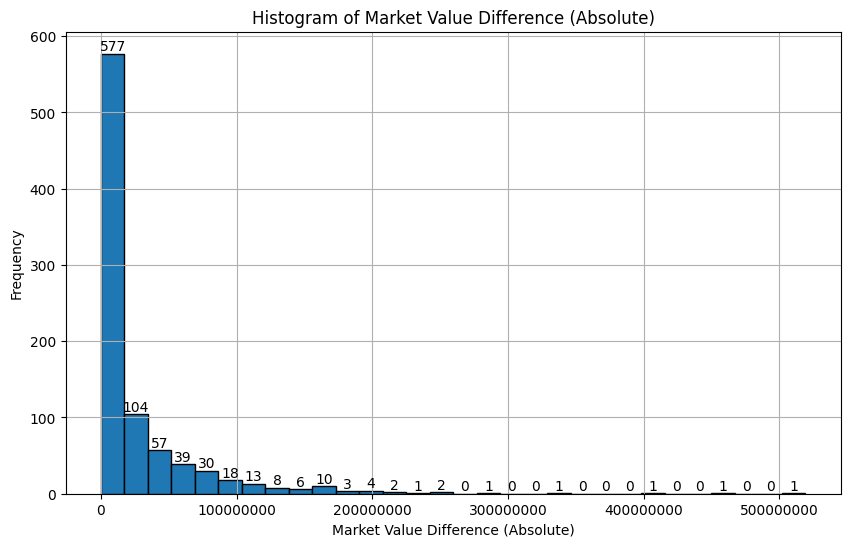

In [28]:
import matplotlib.pyplot as plt

# Create a histogram of the mv_difference_abs column
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(filtered_data['mv_difference_abs'], bins=30, edgecolor='black')
plt.title('Histogram of Market Value Difference (Absolute)')
plt.xlabel('Market Value Difference (Absolute)')
plt.ylabel('Frequency')
plt.grid(True)

# Format the x-axis to display whole numbers
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

# Add labels to the bars
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count), ha='center', va='bottom')

plt.show()